**Goal**: Calculate the gene correlation matrix for a large subset of the GSE86922 data set without running out of time or memory

Update my python import path to include the stats.py module from the course website

In [1]:
import sys
sys.path.append("/home/mvoorhie/Projects/Courses/PracticalBioinformatics/python/webroot/htdocs/code/")

Load the stats.py module with my example pearson function

In [2]:
import stats

Load some other useful tools

In [3]:
import gzip

In [4]:
from csv import reader, excel_tab

Parse the GSE86922 data set

In [5]:
fp = reader(gzip.open("GSE86922_Brodsky_GEO_processed.txt.gz"), dialect = excel_tab)
header = fp.next()
data = []
annotations = []
for row in fp:
    annotations.append(row[:4])
    data.append([float(i) for i in row[4:]])

Naive function for calculating the correlation matrix.  *Note that this doesn't take advantage of the symmetry of the matrix*

In [6]:
def dmat(rows):
    d = []
    for (n,i) in enumerate(rows):
        c = []
        for j in rows:
            c.append(stats.pearson(i,j))
        d.append(c)
    return d

Test runs with increasing $N$ to get a sense of how the problem scales.

We expect $O(N^2)$ for both time and space.

In [7]:
%%time
d = dmat(data[:10])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.16 ms


In [8]:
%%time
d = dmat(data[:100])

CPU times: user 108 ms, sys: 8 ms, total: 116 ms
Wall time: 85.2 ms


In [9]:
%%time
d = dmat(data[:500])

CPU times: user 1.77 s, sys: 64 ms, total: 1.83 s
Wall time: 1.71 s


In [10]:
%%time
d = dmat(data[:1000])

CPU times: user 6.77 s, sys: 80 ms, total: 6.85 s
Wall time: 6.71 s


In [11]:
%%time
d = dmat(data[:2000])

CPU times: user 26.5 s, sys: 192 ms, total: 26.7 s
Wall time: 26.5 s


Filter for detected transcripts

*Here I'm using a **list comprehension** instead of an explicit for loop.  It's just a convenient short hand.*

In [12]:
from math import log

In [13]:
f = [i for i in data if(sum(1 for j in i if(j >= log(10)/log(2))) >= 2)]
len(f)

9740

In [14]:
%%time
d = dmat(f[:10])

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 27 ms


In [15]:
%%time
d = dmat(f[:100])

CPU times: user 80 ms, sys: 4 ms, total: 84 ms
Wall time: 80.7 ms


In [16]:
%%time
d = dmat(f[:1000])

CPU times: user 6.83 s, sys: 56 ms, total: 6.88 s
Wall time: 6.83 s


In [17]:
%%time
d = dmat(f[:2000])

CPU times: user 26.7 s, sys: 156 ms, total: 26.8 s
Wall time: 26.6 s


In [18]:
%%time
d = dmat(f)

CPU times: user 10min 39s, sys: 3.21 s, total: 10min 42s
Wall time: 10min 38s


Note that the full matrix run time is as predicted by quadratic scaling from the first 2k rows

In [19]:
26*25./60

10.833333333333334

So, we can afford to *calculate* the matrix for the ~10k expressed transcripts, but this is a bit large for *plotting*.

Let's do a more aggressive filter for differentially expressed genes.

Filter for 4x change between two samples

In [20]:
f2 = [i for i in f if(max(i)-min(i) >= 2)]
len(f2)

2779

In [21]:
%%time
d = dmat(f2)

CPU times: user 52.5 s, sys: 224 ms, total: 52.7 s
Wall time: 52.3 s


This is small enough for an interactive plot, so let's take a look at it

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


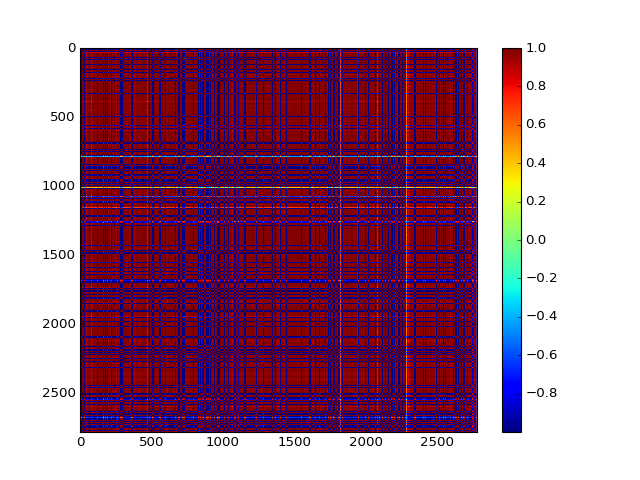

In [23]:
fig = plt.figure()
plt.imshow(d, interpolation = "none", aspect = "auto")
plt.colorbar()